# Classify the fashion MNIST dataset

This notebook gives a simple example on how to calssify the fashion MNIST dataset using a densely connected Neural Network in the TensorFlow 2.0 framework. The images are 28 x 28 gray scale images.
After building and training the network, two self made pictures with a convinient smartphone camera are preprocessed in order to feed them forward and classify the images.

The first part is from [Google's TF 2.0 page](https://www.tensorflow.org/beta/tutorials/keras/basic_classification)

## Preparing the processing environment

In [3]:
#install tensoflow 2.0.0 via pip
#use ! as an escape sign to execute shell commands
!pip install -q tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 41kB/s 
     |████████████████████████████████| 3.8MB 38.4MB/s 
     |████████████████████████████████| 450kB 59.8MB/s 
     |████████████████████████████████| 81kB 10.9MB/s 
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 which is incompatible.


In [0]:
#restart your runtime

In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import pickle

print('TF version: {}'.format(tf.__version__))
print('keras version: {}'.format(tf.keras.__version__))
print('Built with cuda: {}'.format(tf.test.is_built_with_cuda()))
if tf.test.is_built_with_cuda == True:
    print('GPU: {}'.format(tf.test.gpu_device_name()))
    print(tf.test.is_built_with_gpu_support())
else:
    print('No GPU support available')


TF version: 2.0.0
keras version: 2.2.4-tf
Built with cuda: False
No GPU support available


In [2]:
#import colab package and mount you accounts associated google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
##create folder structure and clone git for the first time in to it
##use % as an meta escape sign to execute cd command

!mkdir ./drive/My\ Drive/repos
%cd /content/drive/My\ Drive/repos
!git clone https://github.com/thho/dl_ws

/content/drive/My Drive/repos


In [0]:
#change into the dir, use % as an meta escape sign to execute cd command

%cd ./mnist_fashion/

/content/drive/My Drive/repos/mnist_fashion


In [0]:
#check your git for updates

#!git pull

remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 144 (delta 21), reused 1 (delta 0), pack-reused 108
Receiving objects: 100% (144/144), 952.37 KiB | 3.41 MiB/s, done.
Resolving deltas: 100% (91/91), done.
From https://github.com/thho/mnist_fashion
   c27c7fb..7f3516f  master     -> origin/master
 * [new branch]      cnn_ex     -> origin/cnn_ex
 * [new branch]      hasche_ex  -> origin/hasche_ex
Updating c27c7fb..7f3516f
Fast-forward
 mnist_fashion.ipynb | 942 +++++++++++++++++++++++++++++++++++++++++++++-------
 tasks.md            |  61 ++++
 2 files changed, 877 insertions(+), 126 deletions(-)
 create mode 100644 tasks.md


## Importing packages and loading the dataset

In [1]:
#importing all needed packages 
#TensorFlow and tf.keras
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [0]:
#import the fashion MNIST dataset directly from TensorFlow

fashion_mnist = keras.datasets.fashion_mnist

#loading the dataset returns four numpy arrays
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
#check dataset structure

print("There are " + str(train_labels.shape) + "labels")
print("and " + str(train_images.shape[0]), "images with a size of " + str(train_images.shape[1:3]) + "pixels")

There are (60000,)labels
and 60000 images with a size of (28, 28)pixels


In [0]:
#setting the class labels as list

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

**Exercise 1**


* Which version of TensorFlow is used in this script?
* How many images in **total** are in the MNIST fashion data set? What is their size? Show me the code you have used to figure that out
* Of which type is the object ```class_name```?



## Image preprocessing

The imges has to be preprocessed, the pixel values should scale from 0 to 1 when using them in the NN

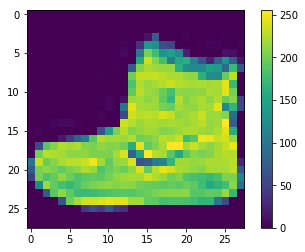

In [0]:
#plotting the first image of the training dataset
#calling a plot
plt.figure()
#passing the array to plot to the plot
plt.imshow(train_images[0])
#adding a color bar
plt.colorbar()
#rendering the plot
plt.show()

The next chunk normalizes the gray scale values to a range of $ [0,1] $

In [0]:
#normalize the the dataset values
train_images = train_images / 255
test_images = test_images / 255

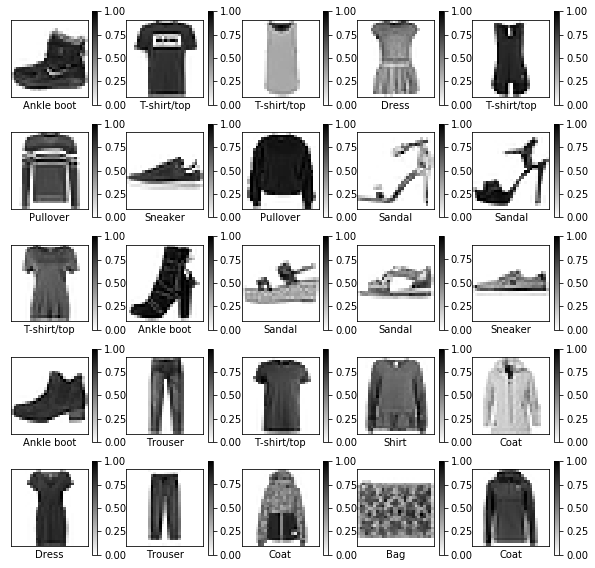

In [0]:
#for an overview lets plot the first 25 images of the dataset with their labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.colorbar()
plt.show()

**Exercise 2**

* Plot a normalized grayscale image with a data range of 0-1 of the nienth image of the ```train_images```

# Build a densely connected neural network model

A layer is a building block of a network. The combination of layers choosen hopefully represent the problem at hand meaningful. In this example, we use the implemented layers in TF.

The first layer ```keras.layers.Flatten()``` transforms the input image from a 28 x 28 raster image to a 784 one dimensional layer, unstacked row wise.
The second and third layers ```keras.layers.Dense()``` are densely connected/fully connected neural layers, with 128 and 10 neurons respectively. from the 128 neuron layer, the activation function is the ReLu and for classification, the output layer with 10 classes (as many as different labels are possible in the dataset) a softmax activation provides probability values as output of the complete network.

In [0]:
#define the network's architecture

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

## Compile the model

Before train and later run the model, we need to add further information to the model, like:
* The Loss function: Measurement on how accurate the model is during training, our goal is to minimize this function
* Optimizer: The algorithm which is used to update the model based in the training data and the corresponding loss comparison
* Metrics: Used to monitor the training and test steps

In [0]:
#set additional network hyperparameter

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## Train the model

* Feed in training data and labels
* The model learns to associate images and labels
* Test the model with the test set and verify the model performance on that

Training is done with ```model.fit()```

In [0]:
#train your model via passing forward, evaluate, backprop reassign weights
#this step might take a while...
model.fit(train_images, train_labels, epochs=10)

W0723 16:09:05.689767 140396701738880 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.5084 - accuracy: 0.8221
Epoch 2/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3783 - accuracy: 0.8644
Epoch 3/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3396 - accuracy: 0.8773
Epoch 4/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.3150 - accuracy: 0.8855
Epoch 5/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2983 - accuracy: 0.8910
Epoch 6/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2827 - accuracy: 0.8950
Epoch 7/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2715 - accuracy: 0.8995
Epoch 8/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2606 - accuracy: 0.9030
Epoch 9/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2491 - accuracy: 0.9080
Epoch 10/10
60

## Evaluate accuracy

To see how the model performs on unseen data, we use the test set.

In [0]:
#use the test data set split for evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.3595 - accuracy: 0.8739

Test accuracy: 0.8739


**Exersice 3**

* Describe the structure of the NN
* What is the ```sparse_categorical_crossentropy``` loss function? Look for an article or blog or something similar with an explanation and try to give a summary by yourself (hnoestly I do not know myself...I do have an idea, look around mybe you find a good explanation...also look into the Tensorflow handbook, it is likely that you find some information there)
* Create a second NN called model_sig:
    * You can use the original model as template
    * double the neurons in the second layer
    * add a third densely connected layer with 128 neurons and the sigmoid as activaiton function
* what happens with:
    * training time 
    * accuracy

## Make predictions

Now we will make predictions on unseen data, presenting the probability of the classified images

In [0]:
#use the trained model for predictions just forward pass of unseen data
predictions = model.predict(test_images)

In [0]:
#get the predictions for the first unseen image
predictions[0]

array([6.7732159e-08, 2.0325927e-10, 6.5021166e-09, 5.9264358e-09,
       4.1508117e-09, 4.5897849e-04, 1.2201339e-07, 4.8734457e-03,
       3.3840192e-07, 9.9466705e-01], dtype=float32)

In [0]:
#the highest probability of the predition for the first image
max(predictions[0])

0.99466705

In [0]:
#get the name for the highest probability
class_names[np.argmax(predictions[0])]

'Ankle boot'

<function matplotlib.pyplot.show>

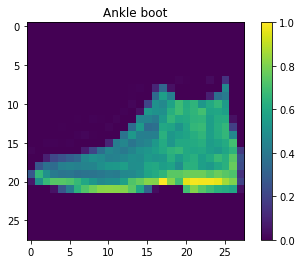

In [0]:
#plot the first picture with the prdicted class name
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.title(class_names[np.argmax(predictions[0])])
plt.show

**Exercise 4**

 * Plot the ninth test image with the predicted label

Lets make this plot with more information inculding the probability values:

In [0]:
#create a function for plotting the first images with their predictions

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
        
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

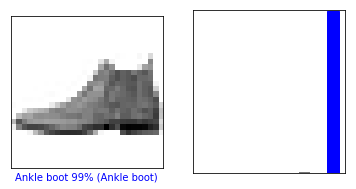

In [0]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

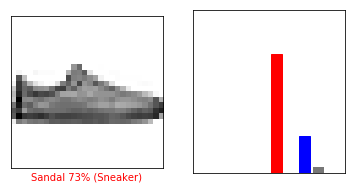

In [0]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

In [0]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# Now lets try some own data collected with a smart phone camera

## Preprocessing

We first have to reduce to grayscale and then to a 28 x 28 pixel size. We also have to normalize the values and put them in a object structure which can be passed to the neural net. In this case a np array which holds np array for each given picture with a structure of ($n$, 28 ,28)
where $n$ is the numer of images.

In [0]:
#for image processing we use the opencv (open computer vision) package
import cv2

In [0]:
#read image; you might have to adapt the path, but when you use the
#forkflow with mounting your google drive, it might work just fine
img = cv2.imread('./cloth/coat_arms_val.jpg')

In [0]:
img.shape

(2960, 3120, 3)

In [0]:
#display img, this does not work in google colab!
#when the window fires up, close it by hitting 0
#cv2.imshow('image', img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [0]:
#from the RGB image make a single grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#normalize the image as we did with the training data
gray = gray / 255

<function matplotlib.pyplot.show>

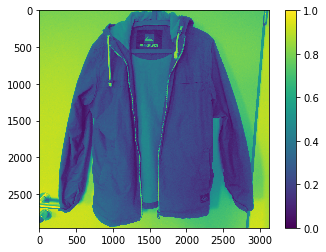

In [0]:
#plotting the grayscale image
plt.figure()
plt.imshow(gray)
plt.colorbar()
plt.show

In [0]:
#The image is to large (in width and hight) to pass it to the network
#we have to reuduce the image to a 28 x 28 image...
rs_gray = cv2.resize(gray, (28, 28))

<function matplotlib.pyplot.show>

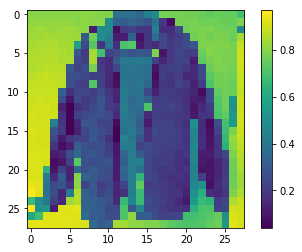

In [0]:
#plot the 28x28 resampled version of the image 
plt.figure()
plt.imshow(rs_gray)
plt.colorbar()
plt.show

In [0]:
#After that, we also have to create an object the network is made for, in this case, it is a 
#numpy array with the dimensions (n, 28, 28), where n is the number of images, we put in it
rs_gray = np.array([rs_gray])

In [0]:
rs_gray.shape

(1, 28, 28)

In [0]:
predictions = model.predict(rs_gray)

<function matplotlib.pyplot.show>

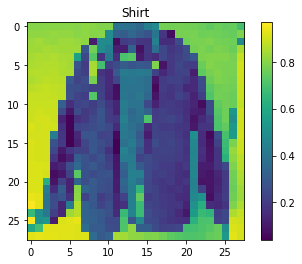

In [0]:
plt.figure()
plt.imshow(rs_gray[0])
plt.colorbar()
plt.title(class_names[np.argmax(predictions[0])])
plt.show

In [0]:
predictions

array([[3.6002188e-05, 2.0517239e-11, 1.3789508e-10, 3.3899061e-13,
        5.4770110e-13, 2.5152842e-06, 7.5236934e-01, 8.7626720e-22,
        2.4759217e-01, 7.9218548e-10]], dtype=float32)

In [0]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

**Exercise 5**

* The predicted label for the coat is probably wrong. Make an assumption why this is the case.

## Processing multiple images

Now that we know our workflow works for a single custom image, we will write code for passing forward as many custom imgaes as we want to.

In [0]:
#import a library that can handle os commands
import glob

In [0]:
#get all jpg file paths
img_list = glob.glob("./cloth/*.jpg")

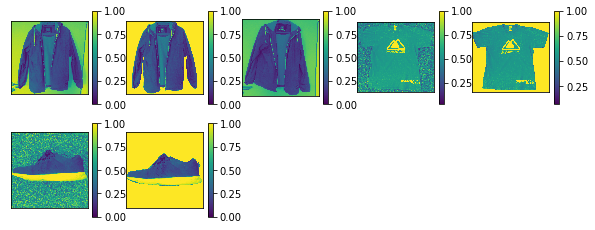

In [0]:
#plot all custom test images in their sensing resolution
plt.figure(figsize=(10,10))
for i in range(len(img_list)):
    img = cv2.imread(img_list[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = gray / 255
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(gray)
    plt.colorbar()
plt.show()

In [0]:
#prepare an pbject of type list to put all input images into it before
#making a numpy array out of it
ff_img = list([])

In [0]:
#reading all images of type jpg, and preprocess them in a for loop 
#one imag eafter an other. Append each image to the prepared list object and
#finally make a np.array of the list holding all images we want to predict
for i in range(1,len(img_list)+1):
    img = cv2.imread(img_list[i-1])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rs_gray = cv2.resize(gray, (28, 28))
    ff_img.append(rs_gray)

ff_img = np.array(ff_img) / 255
ff_img[ff_img==1]=0

<function matplotlib.pyplot.show>

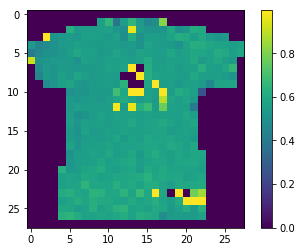

In [0]:
#plot one of the preprocessed images...looks like a shirt
plt.figure()
plt.imshow(ff_img[4])
plt.colorbar()
plt.show

In [0]:
#predict the classes for all custom images
predictions = model.predict(ff_img)

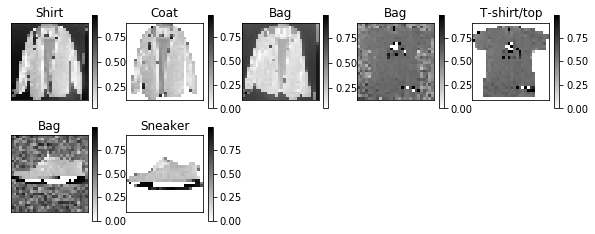

In [0]:
#plot all predicted images with their class names
plt.figure(figsize=(10,10))
for i in range(len(img_list)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ff_img[i], cmap=plt.cm.binary)
    plt.title(class_names[np.argmax(predictions[i])])
    plt.colorbar()
plt.show()

**Exercise 6**

* What is the difference between the three coat, shirt and sneaker image pairs, that show the same object?
* Why are some of them much better predicted than the others? Try to find an explanation concerning the given NN architecture and the input data relative to the training data.

# Convolutional Neural Networks for image classfifcation

As we have seen in the previous example, the image classification using simple densely connected neural networks struggles with some kind of images, it is probably more focussed on simple edeges to classify an object as deep features. Using CNNs might solve this problem, let's find out how to build them in TF 2.0 and redo the classification and testing with data from the MNIST fashion dataset and the custom images!

## Import CNN specific packages

We could do this in the first section of this notbook, but to provide the whole picture of a CNN workflow in TF 2.0 let's start from the very beginning, even when some packages are already imported.

In [0]:
#import packages for CNNs
from __future__ import absolute_import, division, print_function, unicode_literals

#import tf related packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-beta1


## Load and prepare the training and test data

In [0]:
#import the fashion MNIST dataset directly from TensorFlow
#loading the dataset returns four numpy arrays
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

In [0]:
#setting the class labels as list

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Since we are now working with images and convolutional layers, we have to define a slightly other structure of our input numpy arrays as we had before. We are now passing three dimensional tensors to the network of shape (height, width, depth). This enables us to pass for example a 700 x 700 pixel RGB image through the network by defining a 700 x 700 x 3 tensor. In order to do so, we simply reshape the arrays.

In [0]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
#again we need to normalize the images
train_images, test_images = train_images / 255.0, test_images / 255.0

**Exercise 2.1**

* What is a tensor and why do we use three dimensional tensors in a CNN?

## Create a CNN

A CNN can be seen as a network with a convolutional base, which perfroms the convolution and max pooling in order to reduce image size and at the same time create multiple activation maps from deep features, and a densely connected front end which does the classfifcation by fully connected hidden layers with a output layer of width $k$, where $k$ is the number of classes, using the softmax activation function.

In [0]:
#This model was suggested from google for the classical MNIST hand
#written digits classification. However, for the MNIST Fashion 
#dataset it does not work that good therefore I put
#up the model below which works a bit better but does have
#more parameters

#model = models.Sequential()
#model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(10, activation='softmax'))

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

**Exercise 2.2**

* What are the differences of google's MNIST hand written digits CNN and the model I put up for the MNIST fashion data set?
* Try to explain why the different architectures are more suitable for the given task, classifying hand written digits or different kind of cloths.
* Which model do you think takes longer to train and why?

In [0]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 9, 9, 128)         73856     
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 7, 7, 128)         147584    
_________________________________________________________________
flatten_15 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_43 (Dense)             (None, 128)             

In [0]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

**Exrecise 2.3**

* What is the difference between ```layers.MaxPool2D``` and ```layers.MaxPooling2D```


## Train and evaluate the model

After our CNN has been built, we can start training and evaluation:

In [0]:
#training the model
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 202s 3ms/sample - loss: 0.4560 - accuracy: 0.8310
Epoch 2/5
60000/60000 [==============================] - 202s 3ms/sample - loss: 0.2847 - accuracy: 0.8949
Epoch 3/5
60000/60000 [==============================] - 202s 3ms/sample - loss: 0.2446 - accuracy: 0.9095
Epoch 4/5
60000/60000 [==============================] - 202s 3ms/sample - loss: 0.2121 - accuracy: 0.9215
Epoch 5/5
60000/60000 [==============================] - 201s 3ms/sample - loss: 0.1855 - accuracy: 0.9298


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 9s 866us/sample - loss: 0.2392 - accuracy: 0.9174


In [0]:
#import libraries that can handle digital images and os commands
import cv2
import glob

#get all jpg file paths
img_list = glob.glob("./cloth/*.jpg")

#prepare an object of type list to put all input images into it before
#making a numpy array out of it
ff_img = list([])

#reading all images of type jpg, and preprocess them in a for loop 
#one imag eafter an other. Append each image to the prepared list object and
#finally make a np.array of the list holding all images we want to predict
for i in range(1,len(img_list)+1):
    img = cv2.imread(img_list[i-1])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rs_gray = cv2.resize(gray, (28, 28))
    ff_img.append(rs_gray)

ff_img = np.array(ff_img) / 255
ff_img[ff_img==1]=0

print(ff_img.shape)

(7, 28, 28)


In [0]:
#reshape for CNN input
ff_img = ff_img.reshape((7, 28, 28, 1))
print(ff_img.shape)

(7, 28, 28, 1)


In [0]:
#predict the classes for all custom images
predictions = model.predict(ff_img)

In [0]:
#rereshape to plot data
ff_img = ff_img.reshape((7, 28, 28))
print(ff_img.shape)

(7, 28, 28)


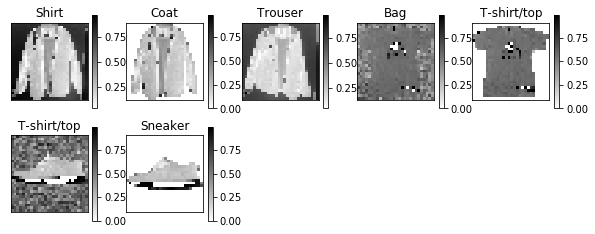

In [0]:
#plot all predicted images with their class names
plt.figure(figsize=(10,10))
for i in range(len(img_list)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ff_img[i], cmap=plt.cm.binary)
    plt.title(class_names[np.argmax(predictions[i])])
    plt.colorbar()
plt.show()